In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def forward(X, W1, b1, W2, b2):
    # because it's binary classification, we are doing two sigmoids in a row
    Z = 1 / (1 + np.exp( -(X.dot(W1) + b1) ))
    activation = Z.dot(W2) + b2
    Y = 1 / (1 + np.exp(-activation))
    return Y, Z

def predict(X, W1, b1, W2, b2):
    Y, _ = forward(X, W1, b1, W2, b2)
    return np.round(Y)

def derivative_w2(Z, T, Y):
    return (T - Y).dot(Z)

def derivative_b2(T, Y):
    return (T - Y).sum()

def derivative_w1(X, Z, T, Y, W2):
    dZ = np.outer(T-Y, W2) * Z * (1 - Z)
    return X.T.dot(dZ)

def derivative_b1(Z, T, Y, W2):
    dZ = np.outer(T-Y, W2) * Z * (1 - Z)
    return dZ.sum(axis=0)

def cost(T, Y):
    tot = 0
    for n in range(len(T)):
        if T[n] == 1:
            tot += np.log(Y[n])
        else:
            tot += np.log(1 - Y[n])
    return tot

In [3]:
def test_xor():
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    Y = np.array([0, 1, 1, 0])
    W1 = np.random.randn(2, 4)  # input dimensions (2), samples (4)
    b1 = np.random.randn(4)
    W2 = np.random.randn(4)
    b2 = np.random.randn(1)  # output dimensions
    LL = []  # keep track of likelihoods
    epochs = 100000
    learning_rate = 0.0005
    regularization = 0.
    last_error_rate = None
    for i in range(epochs):
        pY, Z = forward(X, W1, b1, W2, b2)
        ll = cost(Y, pY)
        prediction = predict(X, W1, b1, W2, b2)
        err = np.abs(prediction - Y).mean()
        if err != last_error_rate:
            last_error_rate = err
            print(f"error rate: {err:.3f}")
            print(f"true: {Y}")
            print(f"prediction: {prediction}")
        if LL and (ll < LL[-1]):
            print("early exit!")
            break
        LL.append(ll)
        W2 += learning_rate * (derivative_w2(Z, Y, pY) - regularization * W2)
        b2 += learning_rate * (derivative_b2(Y, pY) - regularization * b2)
        W1 += learning_rate * (derivative_w1(X, Z, Y, pY, W2) - regularization * W1)
        b1 += learning_rate * (derivative_b1(Z, Y, pY, W2) - regularization * b1)

        if i % 10000 == 0:
            print(f"cost: {ll:.3f}")
    c_rate = 1 - np.abs(prediction - Y).mean()
    print(f"Final classification rate: {c_rate:.3f}")

In [4]:
def test_donut():
    N = 1000
    N2 = int(N/2)
    R_inner = 5
    R_outer = 10

    # distance from origin is radius + random normal
    # angle theta uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N2) + R_inner
    theta = 2 * np.pi * np.random.random(N2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N2) + R_outer
    theta = 2 * np.pi * np.random.random(N2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([X_inner, X_outer])
    Y = np.array([0]* N2 + [1] * N2)

    n_hidden = 8
    W1 = np.random.randn(2, n_hidden)
    b1 = np.random.randn(n_hidden)
    W2 = np.random.randn(n_hidden)
    b2 = np.random.randn(1)
    LL = []
    learning_rate = 0.00005
    regularization = 0.2
    last_error_rate = None
    epochs = 60000
    for i in range(epochs):
        pY, Z = forward(X, W1, b1, W2, b2)
        ll = cost(Y, pY)
        prediction = predict(X, W1, b1, W2, b2)
        err = np.abs(prediction - Y).mean()
        LL.append(ll)
        W2 += learning_rate * (derivative_w2(Z, Y, pY) - regularization * W2)
        b2 += learning_rate * (derivative_b2(Y, pY) - regularization * b2)
        W1 += learning_rate * (derivative_w1(X, Z, Y, pY, W2) - regularization * W1)
        b1 += learning_rate * (derivative_b1(Z, Y, pY, W2) - regularization * b1)
        if i % 1000 == 0:
            print(f"cost: {ll:.3f}, classif. rate: {1-err:.3f}")
    plt.plot(LL)
    plt.show();

    # Create a grid of points
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                        np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Get predicted probabilities
    probs, _ = forward(grid, W1, b1, W2, b2)
    probs = probs.reshape(xx.shape)

    # Plot decision boundary and data
    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap="RdBu", alpha=0.6)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap="RdBu", edgecolor="k")
    plt.title("Decision Boundary")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show();

cost: -834.641, classif. rate: 0.388
cost: -656.728, classif. rate: 0.581
cost: -606.097, classif. rate: 0.691
cost: -535.481, classif. rate: 0.716
cost: -446.382, classif. rate: 0.895
cost: -351.992, classif. rate: 0.971
cost: -275.131, classif. rate: 0.974
cost: -223.040, classif. rate: 0.971
cost: -191.375, classif. rate: 0.972
cost: -169.889, classif. rate: 0.974
cost: -152.979, classif. rate: 0.974
cost: -138.686, classif. rate: 0.980
cost: -127.650, classif. rate: 0.981
cost: -119.049, classif. rate: 0.984
cost: -112.044, classif. rate: 0.984
cost: -106.180, classif. rate: 0.985
cost: -101.181, classif. rate: 0.985
cost: -96.862, classif. rate: 0.986
cost: -93.089, classif. rate: 0.987
cost: -89.762, classif. rate: 0.987
cost: -86.783, classif. rate: 0.987
cost: -83.984, classif. rate: 0.988
cost: -81.281, classif. rate: 0.988
cost: -78.800, classif. rate: 0.988
cost: -76.531, classif. rate: 0.989
cost: -74.454, classif. rate: 0.989
cost: -72.535, classif. rate: 0.987
cost: -70.6

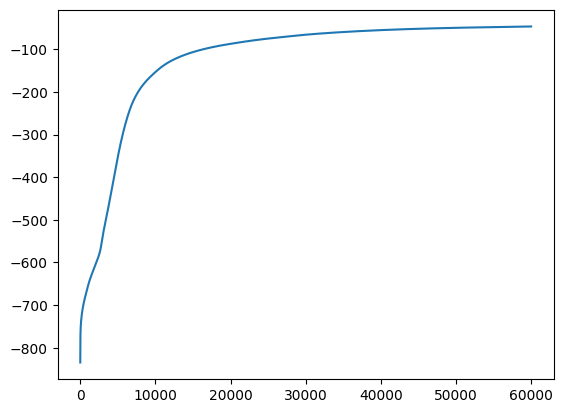

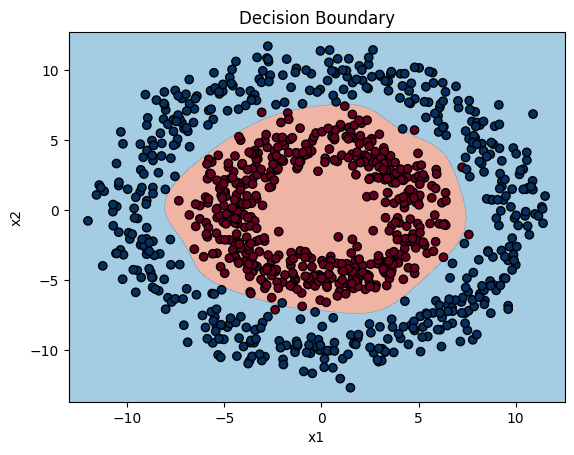

In [5]:
if __name__ == '__main__':
    # test_xor()
    test_donut()